# Исследование надёжности заёмщиков

## Знакомство с данными

In [2]:
import pandas as pd
from pymystem3 import Mystem
import seaborn as sb
import numpy as np
from collections import Counter 

In [3]:
data = pd.read_csv('/Users/vlad/Documents/Documents Linux/Yandex DS/Projects/YandexPracticum-projects/data_cleaning/data.csv')

Посмотрим, что из себя представляют данные.

In [9]:
data.info()
display(data.head(10))
# статистика по численным переменным
display(data.describe())
# статистика по категориальным переменным
data.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


,education,family_status,gender,income_type,purpose
count,21525,21525,21525,21525,21525
unique,15,5,3,8,38
top,среднее,женат / замужем,F,сотрудник,свадьба
freq,13750,12380,14236,11119,797


Проверим находятся ли пропуски в колонках `days_employed` и `total_income` в одних и тех же наблюдениях.

In [13]:
data[data['total_income'].isna()]['days_employed'].unique()

array([nan])

### Вывод

Наши данные описывают клиентов банка.

* Названия колонок соответствуют стандарту. В данных есть две колонки с пропусками: `days_employed` и `total_income`. Количество пропусков совпадает. Эти пропуски находятся в одних и тех же наблюдениях.

* Помимо пропусков в данных наблюдаются аномальные значения. Например, в колонке `days_employed` есть отрицательные значения и аномально большие значения. Некоторые наблюдения имеют значение `children` -1 и 20. 

* В колонке `education`, `family_status`, `gender`, и `purpose` есть неявные дубликаты.

## Предобработка данных

### Обработка пропусков

Проверим сколько пропусков есть в каждой колонке:

In [12]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Одна из потенциальных причин наличия пропусков - неправильная выгрузка данных банком. Можно запросить корректные данные у банка, но это невозможно в нашем случае. Возможно, клиенты банка не указали стаж работы и месячный доход при получении кредита (хотя, это странно). Восстанавливать пропуски по среднему или медианному значению в этом случае некорректно, так как они скорее всего не будут отражать реальную картину. У кого-то зарплата 300к, а у кого-то 50к, в среднем 175к. С трудовым стажем картина другая. Там имеются отрицательные значения. Скорее всего, произошла ошибка при выгрузке данных. Можно заменить отрицательные значения на положительные.

In [14]:
#Изменим отрицательные значения опыта работы на положительные
data['days_employed'] = data['days_employed'].abs()

Пропуски в общем заработке можно извлечь из типа заработка. Сгруппируем значения по типу заработка и рассчитаем медиану и среднее.

In [16]:
#Проверим медиану и среднее
display(data.groupby('income_type')['total_income'].mean())
median_income = data.groupby('income_type')['total_income'].median()
median_income

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        170898.309923
компаньон          202417.461462
пенсионер          137127.465690
предприниматель    499163.144947
сотрудник          161380.260488
студент             98201.625314
Name: total_income, dtype: float64

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

<div class="alert alert-info"> <b>Вопрос от студента:</b> Как обработать пропуски в колонке со стажем работы? Как я писал позже в проекте, там есть аномалии, потому что стаж, переведенный в года, составляет у некоторых несколько тысяч лет.

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Здесь нет единого верного решения. Я бы сначала решил проблему с аномальными значениями, а потом делал заполнение пропусков. 
    
А вот то, как решать эту проблему, зависит от твоих предположений о причинах этих самых аномальных значений.
</div>

Как мы видим, соотношение сохраняется.

Проверим сохраняется ли соотношение различных катеогрий у 'семейного положения':

In [10]:
print(data['family_status'].value_counts() / data.shape[0] * 100)
data['family_status'].value_counts() / data.shape[0] * 100

женат / замужем          57.514518
гражданский брак         19.405343
Не женат / не замужем    13.068525
в разводе                 5.551684
вдовец / вдова            4.459930
Name: family_status, dtype: float64


женат / замужем          57.514518
гражданский брак         19.405343
Не женат / не замужем    13.068525
в разводе                 5.551684
вдовец / вдова            4.459930
Name: family_status, dtype: float64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
А то, что распределение всех данных и данных с пропусками совпадает, скорее намекает на случайность пропусков. </div>

Здесь также нет изменений. Можем использовать таблицу с удаленными пропусками (**data_no_na**).

Помимо явных пропусков есть еще неявные пропуски. Например, в колонке **dob_years** у некоторых наблюдений стоит 0, что невозможно. Здесь можно произвести заполнение пропусков средним или медианой. Однако, стоит проверить совпадают ли они. Для расчет медианы и среднего делали группировку по типу заработка (**income_type**) и семейному положению (**family_status**) так как эти переменные хорошо отражают возраст:

In [11]:
mean_age = data.groupby(['income_type', 'family_status'])['dob_years'].mean()
median_age = data.groupby(['income_type', 'family_status'])['dob_years'].median()
mean_age, median_age

(income_type      family_status        
 безработный      гражданский брак         45.000000
                  женат / замужем          31.000000
 в декрете        женат / замужем          39.000000
 госслужащий      Не женат / не замужем    36.317073
                  в разводе                41.604938
                  вдовец / вдова           53.222222
                  гражданский брак         40.706107
                  женат / замужем          40.686880
 компаньон        Не женат / не замужем    35.439206
                  в разводе                43.058824
                  вдовец / вдова           51.422680
                  гражданский брак         38.501969
                  женат / замужем          40.594333
 пенсионер        Не женат / не замужем    58.744318
                  в разводе                58.305936
                  вдовец / вдова           60.600372
                  гражданский брак         58.653030
                  женат / замужем          58.929564
 предп

Видим что средние и медианые значения совпадают. Заполним ячейки колонки **dob_years** со значениями 0 средним в заисимости от типа дохода и семейного положения:

In [12]:
#Поместил старый код в кавычки
"""
print('Количество наблюдений со значениями 0 в dob_years до замены:', data_no_na[data_no_na['dob_years'] == 0]['dob_years'].count())

for category in mean_age.index:
    for row in range(data_no_na.shape[0]):
        if data_no_na.loc[row, 'income_type'] == category[0] and data_no_na.loc[row, 'family_status'] == category[1]:
            data_no_na.loc[row, 'dob_years'] = mean_age[category[0]][category[1]]
            
print('Количество наблюдений со значениями 0 в dob_years после замены на средние значения:', data_no_na[data_no_na['dob_years'] == 0]['dob_years'].count())"""

#Новый код
#Заменим 0 на NaN
data['dob_years'].replace(0, np.nan, inplace=True)
#Произведем замену пропусков
data['dob_years'] = data.groupby(['income_type', 'family_status'])['dob_years'].apply(lambda x: x.fillna(x.mean()))
#Проверим замену
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Отлично, что не заменяешь все пропуски на общую медиану!

Очень хорошо, что ты пытаешься ставить гипотезы о возможных причинах проблем с данными.</div>

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b>
    
Плохо проходиться по датафрейму циклом. Очень неоптимально. Работает долго.

Я советую подумать над другим решением. Например, использовать `fillna()` для заполнения пропусков для заемщиков целой категории сразу. Или можешь придумать другое решение.</s></div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Заменил цикл на fillna совместно с apply. Работает быстрее.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Хорошо.
    
Но, на самом деле, можно оптимизировать. Ты сейчас побновляешь полностью весь столбец по сути. А можно просто заполнить ТОЛЬКо пропуски.
</div>

Код сработал и произвел замены значений. В целом, пропуски в возрасте не влияют на наше исследование. Проверим что происходит с неявными пропусками в других колонках:

In [13]:
print(data['gender'].value_counts())
data[data['gender'] == 'XNA']

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24.0,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


В колонке **gender** есть одно наблюдений со значением 'XNA'. Странные аномалии происходят и в колонке **children**. Там есть значения -1 и 20. Если 20 еще можно понять (любят люди развлекаться), то как интерпретировать значение -1, не может быть -1 ребенок. Скорее всего произошла ошибка при выгрузке данных. Заменим значение с -1 на 1. Остальные колонки не вызывают подозрений. Можно переходить к замене типа данных.

In [14]:
#Метод abs() возвращает пинятое значение по модулю
data['children'] = data['children'].abs()
(data['children'].value_counts())
data = data[data['gender'] != 'XNA']

**Вывод**

В данных наблюдаются явные (NaN) и неявные пропуски как в категориальных, так и в численных переменных. Пропуски в колонке **total_income** заменили на медиану по категориям из **income_type**. Пропуски в колонке **dob_years** (обозначены как 0) заменили на средние значения (~ совпадают с медианой) в срезах по семейному положение и типу заработка, хотя для проверки гипотез эта замена не играет роли. Один пропуск в колонке **gender** удалили. В колонке **children** заменили значение -1 на 1.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Хорошее решение.</div>

### Замена типа данных

Проверим тип данных во всех переменных:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       19350 non-null float64
dob_years           21524 non-null float64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


В данных есть 4 колонки типа **int64**, 3 колонки типа **float64**, и 5 колонок типа **object**. Заменим числовые данные на целочисленный тип, где необходимо:

Колонки и так находятся в численном типе, но нам нужен конкретно **int**, поэтому лучше воспользоваться методом **astype('int')**:

In [16]:
#Колонку days_employed игнорирую, так как не произвел замены пропусков там
columns_to_change = ['dob_years', 'total_income']
for col in columns_to_change:
    data[col] = data[col].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 12 columns):
children            21524 non-null int64
days_employed       19350 non-null float64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


Изменение типа произошло успешно. Остальные переменные находятся в правильных форматах. Можно переходить к обработке дубликатов.

**Вывод**

Было 3 колонки в формате вщественных чисел. Изменение их типа произвели с помощью метода **astype()**, так как функция **to_numeric()** автоматически определяет тип формата числа (вещественное или целое), к которому приводить число, а нам нужен конкретный формат.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Использование метода `astype()` — хорошее оптимальное решение для нашей задачи. Копейки вряд ли повлияют на наше исследование.

А решение с `to_numeric()` можно удалить, раз оно не подходит.</div>

### Обработка дубликатов

Посчитаем явные дубликаты:

In [17]:
data.duplicated().sum()

54

Есть 54 дубликата. Проверим их:

In [18]:
data[data.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,NaN,41,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для семьи
4182,1,NaN,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,142594,свадьба
4851,0,NaN,60,среднее,1,гражданский брак,1,F,пенсионер,0,118514,свадьба
5557,0,NaN,58,среднее,1,гражданский брак,1,F,пенсионер,0,118514,сыграть свадьбу
7808,0,NaN,57,среднее,1,гражданский брак,1,F,пенсионер,0,118514,на проведение свадьбы
8583,0,NaN,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,118514,дополнительное образование
9238,2,NaN,34,среднее,1,женат / замужем,0,F,сотрудник,0,142594,покупка жилья для сдачи
9528,0,NaN,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,118514,операции со своей недвижимостью
9627,0,NaN,56,среднее,1,женат / замужем,0,F,пенсионер,0,118514,операции со своей недвижимостью
10462,0,NaN,62,среднее,1,женат / замужем,0,F,пенсионер,0,118514,покупка коммерческой недвижимости


Это явно не дубликаты. Не удаляем.

Поищем неявные дубликаты:

In [19]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      667
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

В колонке **education** есть неявные дубликаты. Избавимся от них переведя значения в этой колонке к прописному регистру с помощью метода **str.lower()** и проверим сколько категорий останется, посчитаем сумму наблюдений. Этот метод сработает только если одно и тоже образование записано в разном регистре без ошибок (напр.: ВЫСШЕЕ и Высше посчитались бы как разные категории). В нашем удачном случае все так:

In [20]:
data['education'] = data['education'].str.lower()
print(data['education'].value_counts())
data['education'].count()

среднее                15233
высшее                  5260
неоконченное высшее      743
начальное                282
ученая степень             6
Name: education, dtype: int64


21524

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> 
    
Замечательно, что ты привел к единому регистру значения образования.
</div>

<div class="alert alert-warning">
<s><b>Комментарий ревьюера ⚠️:</b>
    
Почему бы для подсчета количества записей не использовать просто метод `count()`?</s></div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Испоьзовал count().</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Так более логично, да.
</div>

В результате у нас есть 5 категорий образования. Количество наблюдений сохранилось. Проверим неявные дубликаты в колонке **family_status**:

In [21]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4176
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Все выглядит хорошо. Следующие колонки **income_type** и **purpose**:

In [22]:
print(data['income_type'].value_counts())
data['purpose'].value_counts()

сотрудник          11119
компаньон           5084
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
студент                1
в декрете              1
Name: income_type, dtype: int64


свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      623
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

В колонке **purpose** есть неявные дубликаты, убрать их будет сложно ручными методами. Поэтому, сделаем это на слудеющем шаге в ходе лемматизации.

**Вывод**

Дубликаты в колонке **education** появились, скорее всего, из-за того, что разные люди по-разному записывают свое образование (кто-то заглавными буквами, кто-то только прописными). Также и с колонкой **purpose**, для людей 'сыграть свадьбу' и 'свадьба' имеют один и тот же смысл, но для Data Science то две разные категории.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Молодец, что рассмотрел все поля!
</div>

<div class="alert alert-warning">
<s><b>Комментарий ревьюера ⚠️:</b>
    
Общий комментарий к предобработке:

Остались кейсы, в которых стаж превосходит возраст. Можно также попытаться исправить эту проблему.</s></div>

Попрбуем исправить строки, где стаж превышает возраст:

In [23]:
#Посмотрим на такие строки
anomalies = data[(data['days_employed'] / 365) > data['dob_years']]
print(anomalies['income_type'].value_counts())
anomalies.head(10)

пенсионер      3443
безработный       2
Name: income_type, dtype: int64


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823,на покупку подержанного автомобиля
24,1,338551.952911,57,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547,операции с коммерческой недвижимостью
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112,покупка недвижимости
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456,операции с коммерческой недвижимостью
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805,на проведение свадьбы
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342,автомобили
56,0,370145.087237,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,149141,образование
71,0,338113.529892,62,среднее,1,женат / замужем,0,F,пенсионер,0,43929,автомобили
78,0,359722.945074,61,высшее,0,женат / замужем,0,M,пенсионер,0,175127,сделка с автомобилем


<div class="alert alert-info"> <b>Комментарий студента:</b> Видим, что такие значения есть только у безработных (2 наблюдения) и пенсионеров (3443 наблюдения). Это не наталкивает ни на какую мысль. Я принял решение удалить этот столбец из исследования, так как он нам не нужен.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Ок.
    
Это может натолкнуть на мысль, например, что у пенсионеров стаж указан не в днях. Или еще на другие гипотезы.
    
Можно попробовать ограничить стаж для пенсионеров в соответствии с их возрастом.
</div>

In [24]:
data = data.drop('days_employed', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 11 columns):
children            21524 non-null int64
dob_years           21524 non-null int64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


### Лемматизация

Проведем лемматизацию колонки **purpose** и запишем в новую переменную. Далее возьмем предпоследний элемент из каждого листа, именно в этой позиции чаще всего содержаться слова, отражающие цель:

In [25]:
"""
m = Mystem()
purposes = data_no_na['purpose'].apply(m.lemmatize)
purposes_lemm = []
for purpose in purposes:
    purposes_lemm.append(purpose[-2])
    
#Добавим лемматизированные цели в новую колонку в датафрейм
data_no_na['purposes_lemm'] = purposes_lemm
"""

"\nm = Mystem()\npurposes = data_no_na['purpose'].apply(m.lemmatize)\npurposes_lemm = []\nfor purpose in purposes:\n    purposes_lemm.append(purpose[-2])\n    \n#Добавим лемматизированные цели в новую колонку в датафрейм\ndata_no_na['purposes_lemm'] = purposes_lemm\n"

Посмотрим какие категории теперь есть в колонке **purposes_lemm**:

In [26]:
#data_no_na['purposes_lemm'].value_counts()

Появились категории **сдача** и **семья**. Эти названия не отражают реальную цель взятия кредита, поэтому надо разобраться с какими реальными целями ассоциированы эти категории:

In [27]:
#for purpose in purposes:
    #if 'сдача' in purpose or 'семья' in purpose:
        #print(purpose)

Как видим, эти категории ассоциированы с покупкой жилья. Также категории **недвижимость** и **жилье** можно объединить в одну категорию **недвижимость** так как иногда люди покупают недвижимость не только для жилья, но и для коммерческих целей:

In [28]:
#data_no_na["purposes_lemm"].replace({"сдача": "недвижимость", "семья": "недвижимость", "жилье": "недвижимость"}, inplace=True)
        
#data_no_na['purposes_lemm'].value_counts()

В итоге, получили 4 категории целей. Можно переходить к категоризации.

**Вывод**

Лемматизацию проводили с помощью библиотеки **pymystem3**. Сначала получили список списков с лемматизированными целями. Затем взяли предпоследний элемент из каждого списка и добавили в новую колонку **purposes_lemm**. Таким образом мы смогли удалить большинство повторяющихся значений (напр.: покупка автомобиля и  покупка подержанного автомобиля стали категорией автомобиль). Однако, 1158 значений оказались с неправильной категорией, у некоторых наблюдений в словаре с лемматизированными целями на предпоследнем месте оказались слова "семья" и "сдача". Мы проверили с какими целями эти слова ассоциированы в оригинальной колонке **purpose**. Этой категорией оказалось жилье. Заменили "семья" и "сдача" на недвижимость, а также объединили категории **недвижимость** и **жилье**.

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b>
    
Всех этих ручных махинаций с семьей и сдачей можно было избежать.
    
1. Во-первых, хорошо заранее определиться, на какие категории мы будем разбивать цели. Для этого можно провести лемматизацию ВСЕХ целей, и подсчитать частоту, с которой встречается та или иная лемма. Так мы установим основные леммы.

1. Во-вторых, не понятно, почему ты после лемматизации берешь предпоследнее слово. А остальные недостойны? Лучше оставлять все, а потом проверять наличие в них ключевых слов (основных лемм, например), относя к соответствующей категории.</s></div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Я изначально хотел сделать лемматизацию таким способом, но мне не совсем понятно как соотнести нелемматизированные цели с леммами. Попробую  сделать еще раз:</div>

In [29]:
m = Mystem()
#Объединим все цели в одну строку
purposes = ' '.join(data['purpose'])
#Лемматизируем строку
purposes_lemm = m.lemmatize(purposes)
#Посчитаем частотность лемм и выведем 10 самых частых
lemm_count = Counter(purposes_lemm)
lemm_count.most_common(10)

[(' ', 55199),
 ('недвижимость', 6366),
 ('покупка', 5911),
 ('жилье', 4473),
 ('автомобиль', 4315),
 ('образование', 4022),
 ('с', 2924),
 ('операция', 2610),
 ('свадьба', 2348),
 ('свой', 2235)]

После подсчета частотности лемм видим, что можем выделить следующие основные категории: недвижимость, автомобиль, образование, и свадьба. Проведем категоризацию целей в зависимости от встречаемости лемм в них.

In [30]:
def purpose_category(row):
    lemm = m.lemmatize(row['purpose'])
    if 'недвижимость' in lemm or 'жилье' in lemm:
        return 'недвижимость'
    if 'автомобиль' in lemm:
        return 'автомобиль'
    if 'свадьба' in lemm:
        return 'свадьба'
    if 'образование' in lemm:
        return 'образование'
    
data['purposes_lemm'] = data.apply(purpose_category, axis=1)
data['purposes_lemm'].value_counts()

недвижимость    10839
автомобиль       4315
образование      4022
свадьба          2348
Name: purposes_lemm, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Это решение крутое. Ты все сделал верно, так что я не понимаю твой вопрос про нелемматизированные значения.
    
На всякий случай можно также добавить категорию `другое` на случай, если вдруг не учли все цели или данные поменяются.
</div>

### Категоризация данных

Выделить в отдельные словари можно семейное положение, так как писать такие категории сложно, можно ошибиться в написании:

In [31]:
family_status_dict = data[['family_status_id', 'family_status']]
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
data.drop("family_status", axis=1, inplace=True)
family_status_dict

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
👍
</div>

Также можно выделить различные категории зароботка, потому что при проверке гипотез мы не сможем отследить как 19351 значение зароботка по отдельности влияет на возврат кредита, а когда объединяем различные уровни зароботка в категории, становится проще:

In [32]:
#Найдем нижнюю и верхнюю границу заработка
min_income = data['total_income'].min()
max_income = data['total_income'].max()
print(f'Минимальный зароботок: {min_income} в месяц, а максимальный: {max_income} в месяц')

#Можно выделить 4 группы заработка: малозарабатывающие, среднезарабатывающие, зарабатывающие хорошо, и богатые
def income_classifier(row):
    if 20000 < row['total_income'] < 60000:
        return 'малозарабатывющий'
    if 60001 < row['total_income'] < 200000:
        return 'среднезарабатывающий'
    if 200001 < row['total_income'] < 500000:
        return 'хорошозарабатывающий'
    if row['total_income'] > 500000:
        return 'богатый'
    
data['income_category'] = data.apply(income_classifier, axis=1)
data['income_category'].value_counts()

Минимальный зароботок: 20667 в месяц, а максимальный: 2265604 в месяц


среднезарабатывающий    15652
хорошозарабатывающий     4843
малозарабатывющий         806
богатый                   222
Name: income_category, dtype: int64

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Здорово!
</div>

Можно выделить различные группы наблдений в зависимости от количества детей: бездетные, 1-3 ребенка, и многодетные:

In [33]:
#Создадим функцию, которая будет назначать категорию в зависимости от количества детей
def children_category(row):
    if row['children'] == 0:
        return 'бездетные'
    if row['children'] > 3:
        return 'многодетные'
    if 1 <= row['children'] <= 3:
        return 'малодетные'

#Присвоим значение категории в новую колонку
data['children_category'] = data.apply(children_category, axis=1)
data

,children,dob_years,education,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purposes_lemm,income_category,children_category
0,1,42,высшее,0,0,F,сотрудник,0,253875,покупка жилья,недвижимость,хорошозарабатывающий,малодетные
1,1,36,среднее,1,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,среднезарабатывающий,малодетные
2,0,33,среднее,1,0,M,сотрудник,0,145885,покупка жилья,недвижимость,среднезарабатывающий,бездетные
3,3,32,среднее,1,0,M,сотрудник,0,267628,дополнительное образование,образование,хорошозарабатывающий,малодетные
4,0,53,среднее,1,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,среднезарабатывающий,бездетные
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,43,среднее,1,1,F,компаньон,0,224791,операции с жильем,недвижимость,хорошозарабатывающий,малодетные
21521,0,67,среднее,1,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль,среднезарабатывающий,бездетные
21522,1,38,среднее,1,1,M,сотрудник,1,89672,недвижимость,недвижимость,среднезарабатывающий,малодетные
21523,3,38,среднее,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль,хорошозарабатывающий,малодетные


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>
    
Круто, мне нравится такое разбиение.
</div>

<div class="alert alert-warning">
<s><b>Комментарий ревьюера ⚠️:</b>
    
Решение верное, но категоризацию семейного положения можно было не проводить. Мне кажется, исходные категории достаточно хорошие.</s></div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Удалил код с проведением категоризации семейного положения.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

👌
</div>

**Вывод**

Классификацию колонки **family_status** проводили по типу, а колонки **total_income** - по уровню зароботка.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Чтобы ответить на этот вопрос, необходимо найти процент невозврата кредитов среди семей с различным количеством детей:

<div class="alert alert-warning">
<s><b>Комментарий ревьюера ⚠️:</b>

Некрасивое решение. После группировки можно обойтись без формирования датафрейма. Попробуй так: `data_no_na.groupby('children_category').agg({'debt': 'mean'})`. И вообще советую посмотреть примеры использования <a href="https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html">agg()</a>.
</s></div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

1. Можно задать колонке процентный вид и избавиться от умножения на 100, используя стили: `df.style.format({'column_name':'{:.2%}'})`.
    
2. Иногда для ответов на вопросы мало знать только долю невозврата, нужно еще знать размер выборки. Советую добавить такое поле в твою таблицу (можно задать несколько функций для агрегации).
    
3. Огромная похвала тебе за визуализацию результатов!
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Использую pivot_table() для ответа на вопросы.</div>

,children_category,mean,count
,,debt,debt
0,бездетные,7.51%,14148
1,малодетные,9.19%,7250
2,многодетные,9.52%,126


[Text(0, 0.5, 'Ratio of no return'), Text(0.5, 0, 'Children category')]

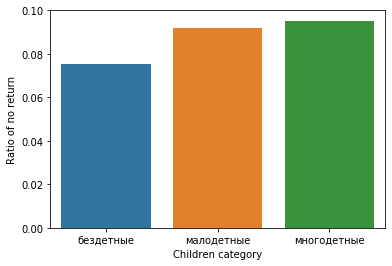

In [34]:
by_children_result = data.pivot_table(values='debt',
                                      index='children_category',
                                      aggfunc=['mean', 'count']).reset_index()

display(by_children_result.style.format({('mean', 'debt'):'{:.2%}'}))

plot_children = sb.barplot(x='children_category',
                           y=('mean', 'debt'),
                           data=by_children_result)

plot_children.set(xlabel='Children category',
                  ylabel='Ratio of no return')

<div class="alert alert-info"> <b>Комментарий студента:</b> Что нам даст добавление размера выборки?</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Отлично!

Во-первых, знание размера выборки может дать нам, кто у нас основные заемщики. Об этом мы в том числе можем написать в выводах.
    
Во-вторых, это может быть показателем того, насколько вообще мы можем доверять полученному результату. Допустим, по проценту невозврата мы получаем, что лучше всего кредиты возвращает некая группа `A`. Но видим, что в ней очень мало заемщиков. Поэтому можем предположить, что полученным результатам не очень следует доверять, выборка нерепрезентативна. Как пример: люди с высшим образованием в наших данных.
</div>

**Вывод**

Как видно из таблицы и графика, количество детей не влияет на возврат кредита. Семьи с разным количеством детей, задерживают возвращение кредита примерно одинаково.Однако, есть небольшая разница, многодетные семьи имеют задолженность чаще. Это можно объяснить тем, что они тратят больше денег на содержание семьи.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Да, ты делаешь верный вывод. В случае, если разница небольшая, можно все равно попробовать описать полученные результаты.
</div>

<div class="alert alert-danger">
<s><b>Комментарий ревьюера ❌:</b>
    
Прекрасно, что ты умеешь применять метод `groupby()`, но мне нужно убедиться в том, что ты освоил метод `pivot_table()`. Давай получим хотя бы два ответа на вопросы с помощью этого метода?</s></div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Молодец.</div>

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Проделаем тоже самое и с семейным положением:

,family_status_id,mean,count
,,debt,debt
0,0,7.52%,12380
1,1,9.29%,4176
2,2,6.56%,960
3,3,7.11%,1195
4,4,9.74%,2813


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


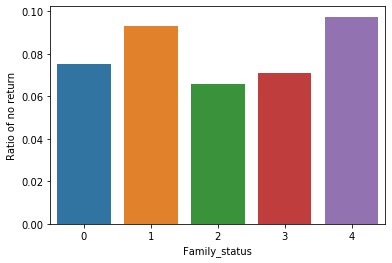

In [35]:
by_family_status_result = data.pivot_table(values='debt',
                                           index='family_status_id',
                                           aggfunc=['mean', 'count']).reset_index()

display(by_family_status_result.style.format({('mean', 'debt'):'{:.2%}'}))

plot_family_status = sb.barplot(x='family_status_id',
                                y=('mean', 'debt'),
                                data=by_family_status_result)

plot_family_status.set(xlabel='Family_status',
                       ylabel='Ratio of no return')
family_status_dict

**Вывод**

Как и в случае с количеством детей, семейное положение не влияет на задолженность по кредиту - люди с различным семейным статусом задерживают выплату кредита одинаково.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Отлично. Здесь тоже можно в выводе все равно попробовать описать полученную разницу, хоть она и совсем небольшая.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2✔️:</b>

Для удобства восприятия ты можешь название категорий добавить в сводную таблицу с процентами.</div>

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Посчитаем процент задолженности в зависимости от уровня зароботка:

,income_category,mean,count
,,debt,debt
0,богатый,6.31%,222
1,малозарабатывющий,6.08%,806
2,среднезарабатывающий,8.52%,15652
3,хорошозарабатывающий,7.10%,4843


[Text(0, 0.5, 'Income_category'), Text(0.5, 0, 'Ratio of no return')]

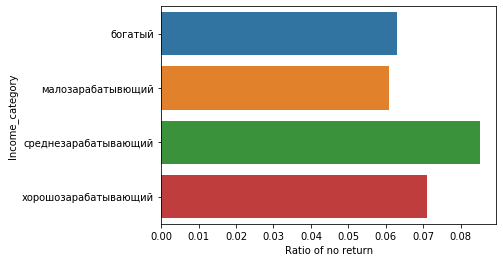

In [36]:
by_income_result = data.pivot_table(values='debt',
                                      index='income_category',
                                      aggfunc=['mean', 'count']).reset_index()

display(by_income_result.style.format({('mean', 'debt'):'{:.2%}'}))

plot_income_category = sb.barplot(x=('mean', 'debt'),
                           y='income_category',
                           data=by_income_result)

plot_income_category.set(xlabel='Ratio of no return',
                  ylabel='Income_category')

**Вывод**

Опять нет никакой зависимости от уровня зароботка и возвратом кредита в срок. Люди с разным достатком имеют одинаковый процент задолженностей. Категория среднезарабатывающих имеет больший процент задолженностей среди других категорий, но они берут больше всех кредитов (15652 кредитов из 21525, это ~73% от всех взятых кредитов).

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Согласен. Здесь тоже можно в выводе все равно попробовать описать полученную разницу. Или сделать какие-нибудь предположения.
</div>

- Как разные цели кредита влияют на его возврат в срок?

,purposes_lemm,mean,count
,,debt,debt
0,автомобиль,9.34%,4315
1,недвижимость,7.21%,10839
2,образование,9.20%,4022
3,свадьба,7.92%,2348


[Text(0, 0.5, 'Purpose'), Text(0.5, 0, 'Ratio of no return')]

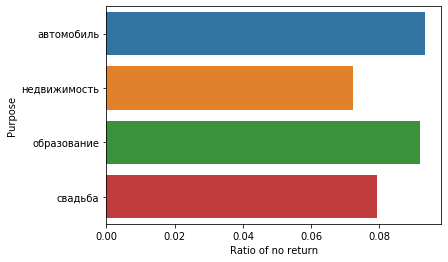

In [37]:
by_purpose_result = data.pivot_table(values='debt',
                                      index='purposes_lemm',
                                      aggfunc=['mean', 'count']).reset_index()

display(by_purpose_result.style.format({('mean', 'debt'):'{:.2%}'}))

plot_purposes = sb.barplot(x=('mean', 'debt'),
                           y='purposes_lemm',
                           data=by_purpose_result)

plot_purposes.set(xlabel='Ratio of no return',
                  ylabel='Purpose')

**Вывод**

Цель кредита не влияет на возврат кредита в срок. Среди всех категорий, кредиты, взятые на автомобили и образование, задалживают чаще.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Верный вывод.
    
Повторюсь еще раз 😀
    
Здесь тоже можно в выводе все равно попробовать описать полученную разницу.
</div>

## Шаг 4. Общий вывод

В ходе работы мы изучили данные, которые нам выдал банк и подготовили из к анализу: удалили пропуски, обработали дубликаты, провели категоризацию, а также заменили типы данных.

В целом, данные были чистыми, а аномалии легко интерпретировались. Исключение - колонка стажа работы. Стаж указан в днях, но если в среднем в году 247 рабочих дней, то кто-то работает около 1500 лет!!! Может эти данные выражены в часах, но все равно выходит 200 лет рабочий стаж, если брать маскимальное значение по колонке. И таких значений в колонке много. Это не одна аномалия.

Было проверено 4 гипотезы:

**1. Влияет ли количество детей на задолженность по кредиту**

**2. Проверили есть ли зависимость между семейным положением и возвратом кредита в срок**

**3. Проверили есть ли зависимость между уровнем дохода и возвратом кредита в срок**

**4. Проверили влияет ли цель получения кредита на задолженность**

Ни одна из гипотез не подтвердилась.

Иногда, один фактор не влиет напрямую, но взаимодействие факторов может влиять на ответ (в нашем случае задержка выплаты кредита). Например, можно было бы проверить как семейное положение и количесвто детей влияет на задолженность по кредиту.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>

Хороший вывод с кратким описанием поставленной задачи и основыми результатами. Можно внести в вывод конкретики: добавить полученные числовые значения.
    
Можно дать более подробное описание проблем с данными для технической команды, дать рекомендации по их устранению в будущем.
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл;
- [x]  файл изучен;
- [x]  определены пропущенные значения;
- [x]  заполнены пропущенные значения;
- [x]  есть пояснение, какие пропущенные значения обнаружены;
- [x]  описаны возможные причины появления пропусков в данных;
- [x]  объяснено, по какому принципу заполнены пропуски;
- [x]  заменен вещественный тип данных на целочисленный;
- [x]  есть пояснение, какой метод используется для изменения типа данных и почему;
- [x]  удалены дубликаты;
- [x]  есть пояснение, какой метод используется для поиска и удаления дубликатов;
- [x]  описаны возможные причины появления дубликатов в данных;
- [x]  выделены леммы в значениях столбца с целями получения кредита;
- [x]  описан процесс лемматизации;
- [x]  данные категоризированы;
- [x]  есть объяснение принципа категоризации данных;
- [x]  есть ответ на вопрос: "Есть ли зависимость между наличием детей и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между семейным положением и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Есть ли зависимость между уровнем дохода и возвратом кредита в срок?";
- [x]  есть ответ на вопрос: "Как разные цели кредита влияют на его возврат в срок?";
- [x]  в каждом этапе есть выводы;
- [x]  есть общий вывод.

<div style="border:solid green 2px; padding: 20px">

<b>Итоговый комментарий ревьюера</b>

Владислав, спасибо за проект! Заметно, что ты хорошо поработал над проектом. Ты освоил базовые приемы предобработки данных, аккуратно и правильно пишешь код, умело применяешь библиотеку pandas. Ты однозначно движешься в верном направлении!
    
К сожалению, были допущены некоторые ошибки, без исправления которых принять проект я не смогу:
<ol>
    <li> Удалить 10% данных с пропусками — не самая хорошая идея. лучше попытаться заполнить пропуски;
    <li> Реализовано крайне неоптимальное решение для заполнения пропусков в возрасте;
    <li> Недостаточно хорошо была проведена лемматизация. Было сделано много лишних действий, которых можно было избежать. Хорошо добавить выделение основных лемм;
    <li> Ты ни разу в проекте не использовал метод <i>pivot_table()</i>, но очень хотелось бы узнать, освоил ли ты его. Давай применим его к ответам на несколько вопросов?
</ol>
    
Также попрошу учесть минимум два любых желтых комментария. Остальные — на твое усмотрение: можно поправить сейчас, если есть силы/желание/время, а можно учесть уже в будущих проектах.
    
Кроме того, можешь задать мне вопросы при повторной отправке проекта, если они у тебя есть.
          
<br>
Буду ждать твою работу на повторное ревью 🙂
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо за детальное ревью! В общем, все понятно. Есть общий вопрос по редактированию исправлений. Как его оформлять? Например, стоит писать новый код в новых ячейках, оставляя старый или можно править старый код?</div>

<div style="border:solid green 2px; padding: 20px">

<b>Итоговый комментарий ревьюера v2 </b>

Сначала отвечу на вопрос. Идеальный вариант: просто закомментировать старый код (или конкретные строки, если исправление небольшое), чтобы сразу была видна разница. Потом плохой код можно будет просто удалить.
    
А теперь про сам проект: ты молодец, учел все мои комментарии. Я оставил тебе несколько новых комментариев (c добавлением `v2`). Если тебе все понятно, и нет новых вопросов, я приму проект при следующей отправке.
</div>

<div class="alert alert-info"> <b>Комментарий студента v2:</b> Еще раз спасибо за ревью!!! Вопросов нет, можно принимать. С Новым годом, желаю счастья и хороших студентов :)</div>

<div style="border:solid green 2px; padding: 20px">

<b>Итоговый комментарий ревьюера v3 </b>

Желаю успехов в будущих проектах 🎄🎄🎄
</div>